In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import os
%matplotlib inline

## 2. Cargar archivo scores.npz
Cargamos el archivo de scores y extraemos los datos relevantes para el análisis.

In [4]:
# Ruta al archivo scores.npz
scores_path = os.path.join('checkpoints', 'convnext_tiny_clas_20251023_221506_MSI', 'scores.npz')
data = np.load(scores_path, allow_pickle=True)
scores = data['scores']
labels = data['labels']
norm_scores = data['norm_scores']
binary_sigmoid = data['binary_sigmoid'] if 'binary_sigmoid' in data else False
effective_classes = int(data['effective_classes']) if 'effective_classes' in data else scores.shape[1]
print(f"Scores shape: {scores.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Norm scores shape: {norm_scores.shape}")

Scores shape: (836, 2)
Labels shape: (836,)
Norm scores shape: (836, 2)


## 3. Visualizar distribución de scores
Graficamos la distribución de los scores para cada clase usando histogramas y KDE plots.

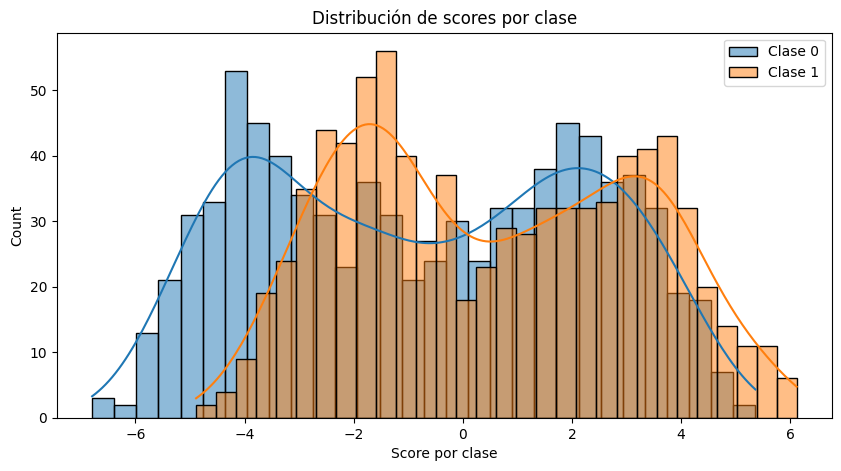

In [5]:
plt.figure(figsize=(10,5))
if effective_classes == 1 or binary_sigmoid:
    # Binario: mostrar scores de la clase positiva
    sns.histplot(scores[:,0], kde=True, bins=30, color='blue', label='Clase 1')
    plt.xlabel('Score clase 1')
else:
    # Multiclase: mostrar scores por clase
    for i in range(scores.shape[1]):
        sns.histplot(scores[:,i], kde=True, bins=30, label=f'Clase {i}')
    plt.xlabel('Score por clase')
plt.title('Distribución de scores por clase')
plt.legend()
plt.show()

## 4. Visualizar matriz de confusión
Calculamos y graficamos la matriz de confusión usando los labels y las predicciones.

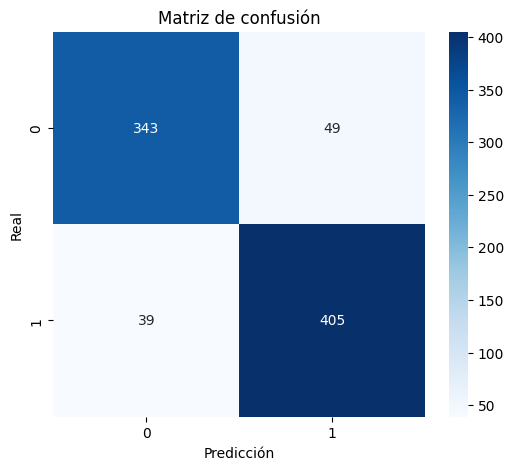

In [6]:
if effective_classes == 1 or binary_sigmoid:
    preds = (scores[:,0] >= 0.5).astype(int)
else:
    preds = np.argmax(scores, axis=1)
cm = confusion_matrix(labels, preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

## 5. Visualizar scores normalizados
Comparamos la distribución de los scores normalizados con los scores originales.

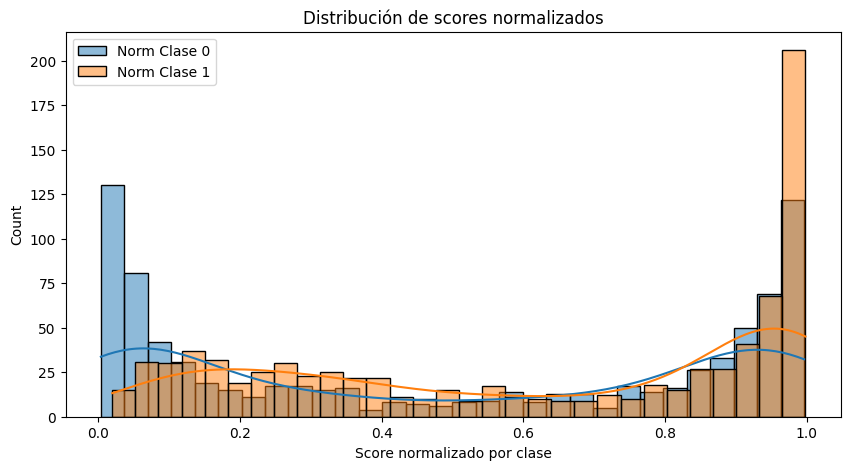

In [8]:
plt.figure(figsize=(10,5))
if norm_scores.shape == scores.shape:
    for i in range(norm_scores.shape[1]):
        sns.histplot(norm_scores[:,i], kde=True, bins=30, label=f'Norm Clase {i}')
    plt.xlabel('Score normalizado por clase')
    plt.title('Distribución de scores normalizados')
    plt.legend()
    plt.show()
else:
    print('La forma de norm_scores no coincide con scores, revisar el archivo.')